In [ ]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
data = pd.read_csv("creditcard.csv")
data.shape

(23858, 31)

In [ ]:
data.head()

In [ ]:
data.describe()

In [ ]:
data.isnull().sum()

In [ ]:
data = data.dropna()
data.isnull().sum()
data.shape

(23857, 31)

In [ ]:
fraud = data[data['Class'] == 1]
not_fraud = data[data['Class'] == 0]
print(len(fraud), len(not_fraud))

88 23769


In [ ]:
fraud.Amount.describe()

count      88.000000
mean      100.010000
std       265.845031
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [ ]:
not_fraud.Amount.describe()

count    23769.000000
mean        73.880199
std        212.541174
min          0.000000
25%          6.000000
50%         18.110000
75%         65.850000
max       7879.420000
Name: Amount, dtype: float64

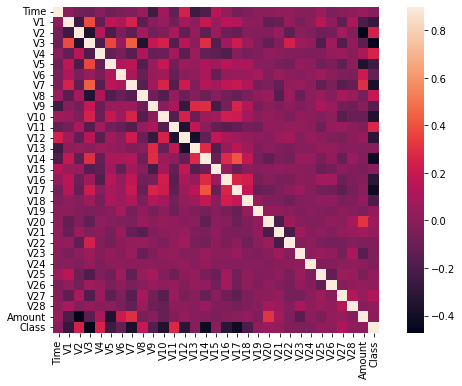

In [ ]:
#correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (10,6))
sns.heatmap(corrmat, vmax= .9, square=True)
plt.show()

In [ ]:
X = data.iloc[:, data.columns!='Class']
Y = data.iloc[:, data.columns=='Class']

In [ ]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [ ]:
Y.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [ ]:
print(X.shape, Y.shape)

(23857, 30) (23857, 1)


In [ ]:
X_data = X.values
Y_data = Y.values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_data, Y_data, train_size=.7)
print(X_train.shape, X_val.shape)

(16699, 30) (7158, 30)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, Y_train)
yPred = rfc.predict(X_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

n_errors = (yPred != Y_val).sum()

# Y_val first, then predicetd values

accuracy = accuracy_score(yPred, Y_val)
print(accuracy)

precision = precision_score(Y_val, yPred)
print(precision)

recall = recall_score(Y_val, yPred)
print(recall)

f1_score = f1_score(Y_val, yPred)
print(f1_score)

matthewscoef = matthews_corrcoef(Y_val, yPred)
print(matthewscoef)


0.9993014808605756
1.0
0.8387096774193549
0.9122807017543859
0.9154898617131547


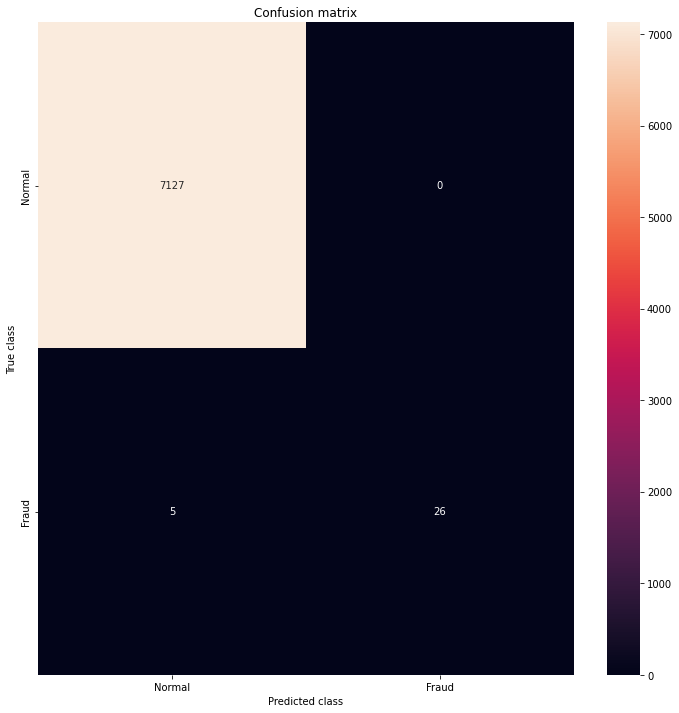

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_val, yPred)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");\
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

In [ ]:
#nueural network version - might not work cause data is massively unbalanced

model = tf.keras.Sequential([
                             tf.keras.layers.Dense(64, activation='relu'), #"""input_shape=([30])''',
                             tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])
model.fit(X_train, Y_train,epochs=5,batch_size=100, validation_data=(X_val,Y_val))

Epoch 1/5
167/167 [==============================] - 2s 8ms/step - loss: 5.5100 - accuracy: 0.6386 - val_loss: 0.0713 - val_accuracy: 0.9951
Epoch 2/5
167/167 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9963 - val_loss: 0.0713 - val_accuracy: 0.9951
Epoch 3/5
167/167 [==============================] - 1s 4ms/step - loss: 0.0563 - accuracy: 0.9963 - val_loss: 0.0713 - val_accuracy: 0.9951
Epoch 4/5
167/167 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9963 - val_loss: 0.0713 - val_accuracy: 0.9951
Epoch 5/5
167/167 [==============================] - 1s 5ms/step - loss: 0.0563 - accuracy: 0.9963 - val_loss: 0.0713 - val_accuracy: 0.9951


In [ ]:
yPredict_nn = model.predict(X_val)
yPredict_nn = np.where(yPredict_nn < 0, 0, 1)
#for i in range(len(yPredict)):
#    if yPredict[i] < 0:
#      yPredict[i] == 0 
#    else:
#      yPredict[i]+ == 1
print(yPredict_nn)
print(Y_val)
accuracy = accuracy_score(yPredict_nn, Y_val)
print(accuracy)

[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [0.]]
0.995110366024029


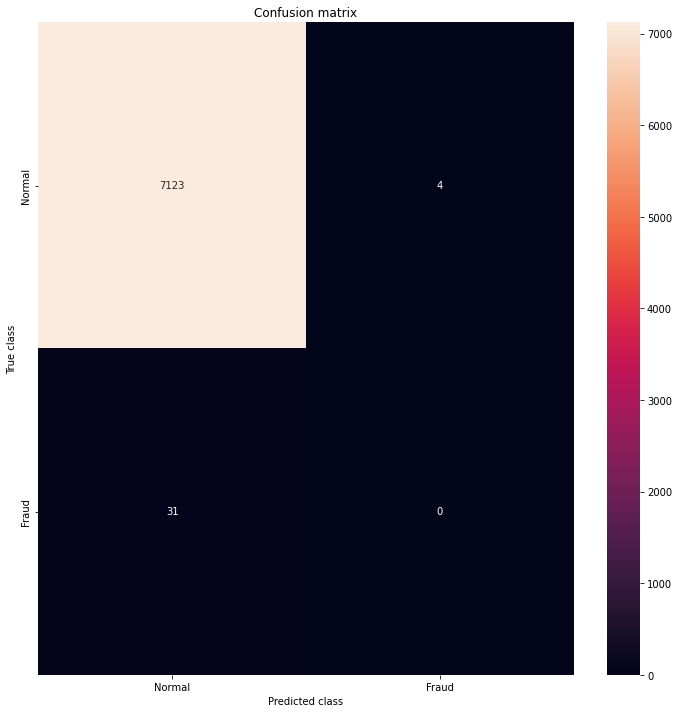

In [ ]:
LABELS = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(Y_val, yPredict_nn)
plt.figure(figsize =(12, 12))
sns.heatmap(conf_matrix, xticklabels = LABELS,
            yticklabels = LABELS, annot = True, fmt ="d");\
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()